Importing necessary Libraries.

In [1]:
import scipy
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score, accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.metrics.pairwise import linear_kernel
import pandas as pd
import seaborn as sns
import numpy as np

## Important Note:<br>
To execute the code properly datasets has to be in the same folder where this note-book file executed. <br>
You can execute the whole notebook at once.


<ipython-input-2-ad7ced50ddbf>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


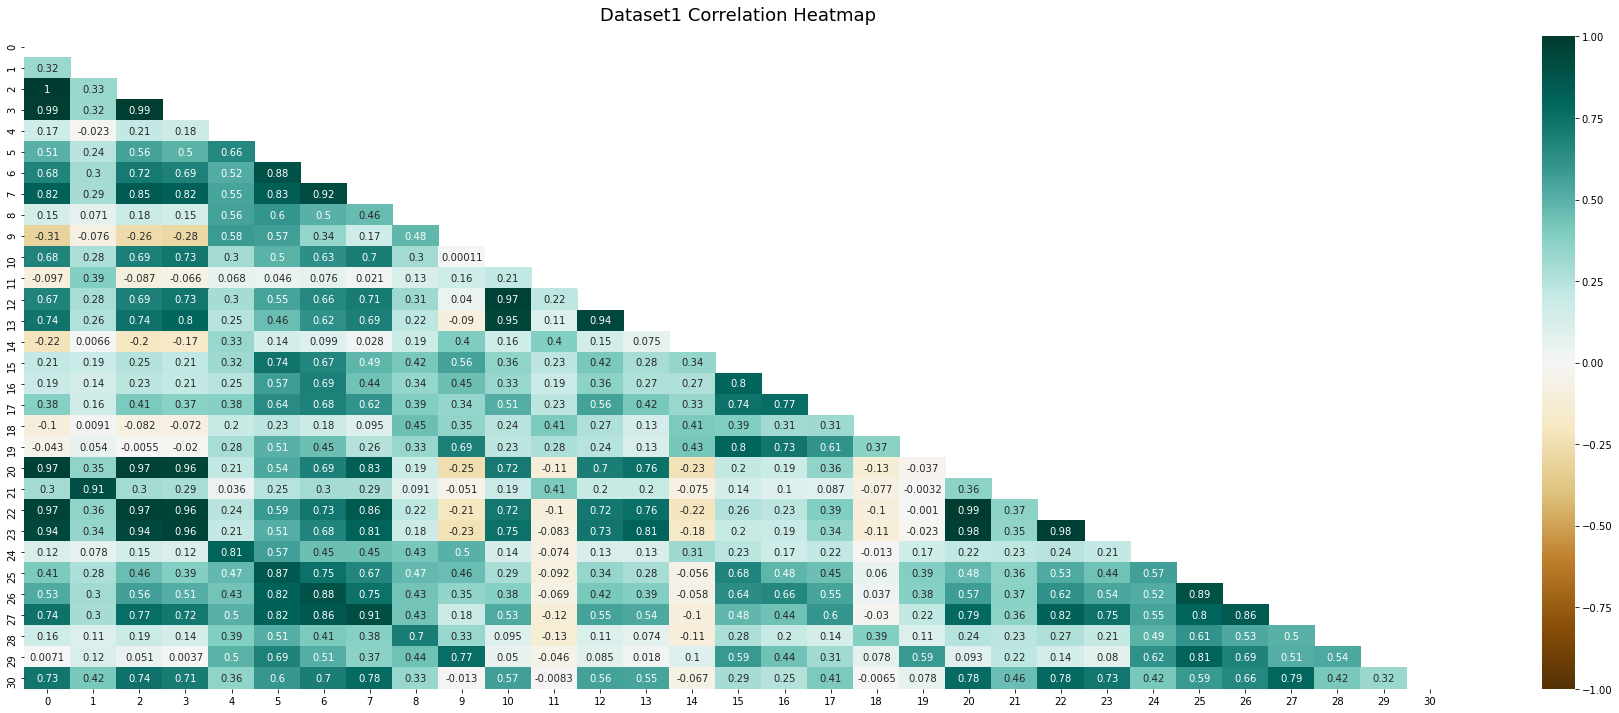

In [2]:
# Importing the dataset1
df = pd.read_csv('./project3_dataset1.txt', delimiter = "\t", header= None)

plt.figure(figsize=(32, 12))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Dataset1 Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
#plt.savefig("Dataset1 Correlation Heatmap"    + '.png', bbox_inches='tight')

<ipython-input-3-264bd2b3d216>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df2.corr(), dtype=np.bool))


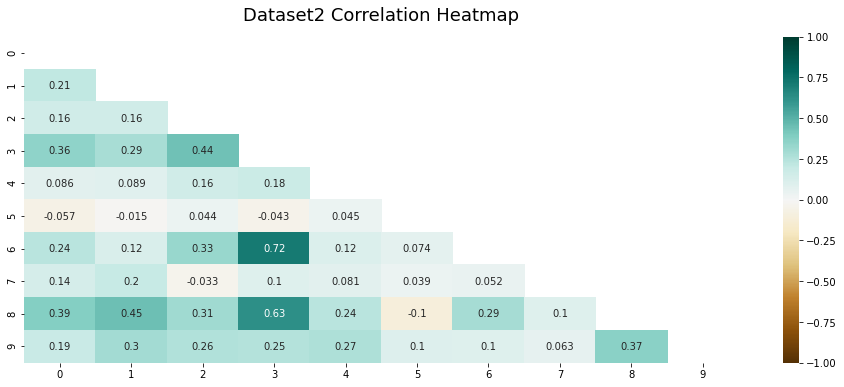

In [3]:
# Importing the dataset2 and mapping present and absent to 1 and 0s as preprocessing
df2 = pd.read_csv('./project3_dataset2.txt', delimiter = "\t", header= None)
df2 = df2.replace(to_replace="Present",
           value=1)
df2 = df2.replace(to_replace="Absent",
           value=0)

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df2.corr(), dtype=np.bool))
heatmap = sns.heatmap(df2.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Dataset2 Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
#plt.savefig("Dataset2 Correlation Heatmap"    + '.png', bbox_inches='tight')

Applying Normalization Technique

In [4]:
df_min_max_scaled = df.copy()

# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
target_column = len(df_min_max_scaled.columns) -1
    
data = df_min_max_scaled.iloc[:,:target_column]
target = df_min_max_scaled.iloc[:,[target_column]]


In [5]:
df2_min_max_scaled = df2.copy()

# apply normalization techniques
for column in df2_min_max_scaled.columns:
    df2_min_max_scaled[column] = (df2_min_max_scaled[column] - df2_min_max_scaled[column].min()) / (df2_min_max_scaled[column].max() - df2_min_max_scaled[column].min())
target2_column = len(df2_min_max_scaled.columns) -1
    
data2 = df2_min_max_scaled.iloc[:,:target2_column]
target2 = df2_min_max_scaled.iloc[:,[target2_column]]


Using train_test_split for splitting Training and Testing Data.
Train test split is a model validation process that allows you to simulate how your model would perform with new data. 

In [6]:

x_train1, x_test1, y_train1, y_test1 = train_test_split(data, target, test_size=0.25, random_state=0)
x_train2, x_test2, y_train2, y_test2 = train_test_split(data2, target2, test_size=0.25, random_state=0)




#y_train = y_train.values.ravel()
#y_train = y_train.values.ravel()

***GridSearchCV:*** GridSearchCV is a technique for finding the best parameter values in a grid given a set of parameters. It is, in essence, a cross-validation technique. Both the model and the parameters must be entered. Predictions are made after extracting the best parameter values. GridSearchCV evaluates the model for each combination of the values passed in the dictionary using the Cross-Validation method. As a result of using this function, we can calculate the accuracy/loss for each combination of hyperparameters and select the one with the best performance.

In [7]:
#Using GridSearchCv to find best parameters.

# Param Grid for SVC
param_grid_svc = {'C': [0.1, 1, 10, 100],  
              'gamma': ['scale', 'auto',100,10,1, 0.1, 0.01, 0.001], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
          
# Param Grid for Logistic Regression
param_grid_logisticRegr = {'C': [ 0.01, 0.1, 1, 10, 100, 1000,10000]}
#penalty in [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]

# Param Grid for KNN
k_range = [2,3,5,7,9,11,13,15]
weights = ['uniform','distance']
metric = ['minkowski','euclidean','manhattan']
param_grid_knn = dict(n_neighbors=k_range, weights = weights , metric = metric )

# Param Grid for Decison tree
param_grid_decisionTree = {'criterion':['gini','entropy'],
            "max_depth" : [1,3,5,7,9,11,12],
            "max_features":[1,5,10,20,"auto","sqrt","log2",None],
            "max_leaf_nodes":[10,20,30,40,50,60,70,80,90, None] }

# Param Grid for RandomForestClassifier()
max_depth=[2, 4, 8, 16,32,64,128,None]
n_estimators = [32, 64, 128, 256, 512]
criterion = ['gini','entropy']
max_features = [1,5,10,20,"auto","sqrt","log2",None]
param_grid_randomForest = dict(max_depth=max_depth, n_estimators=n_estimators, criterion = criterion, max_features = max_features)

## Param Grid for adaBoost
param_grid_adaBoost = dict()
param_grid_adaBoost['n_estimators'] = [5, 25, 50, 100, 500]
param_grid_adaBoost['learning_rate'] = [ 0.01, 0.1, 1.0, 10, 100]

In [8]:
# The function used to evaluate the best model of each algorithm
def evaluateModelExtended(y_pred , y_test,x_train, y_train,  model, classiferName, prob = True):
    print("Evaluation for ",classiferName)
    print("Accuracy score    = ", accuracy_score(y_test, y_pred))
    print("Precision score   = ", precision_score(y_test, y_pred, average='macro'))
    print("Recall score      = ", recall_score(y_test, y_pred, average='macro'))
    if(prob):
      if(classiferName != 'svc'):
          print("Roc AUC score     = ", roc_auc_score(y_train, model.predict_proba(x_train)[:, 1]))
    print("F1 score          = ", f1_score(y_test, y_pred))
    print("\n")
    return

In [9]:

#This fucntion 
def hyperParamTuning(model_name,param_grid ,x_train ,y_train ,x_test, y_test, label  ):
    dic_models = {"logistic_regression" :LogisticRegression, "k_nearest_neighbors":KNeighborsClassifier , 
       "decision_tree" : DecisionTreeClassifier, "random_forest" : RandomForestClassifier, "adaBoost" :AdaBoostClassifier, "support_vector_machine" : SVC   }
    model = dic_models[model_name]()
    y_train_raveled = y_train.values.ravel()
    grid = GridSearchCV(model, param_grid, refit = True, verbose = 3,n_jobs=-1,cv= 10, return_train_score=True) 
    
 # fitting the model for grid search 
    grid_search = grid.fit(x_train, y_train)
    train_scores = grid_search.cv_results_['mean_train_score']
    cv_params = grid_search.best_params_
    scores= grid_search.cv_results_['mean_test_score']
    location = []
    sizes = []
    combinations = 1
    best_loc = 0
    key_set = list(param_grid.keys())
    n = len(key_set)
    for key in param_grid.keys():
        loc = param_grid[key].index(cv_params[key])
        location.append(loc)
        size = len(param_grid[key])
        sizes.append(size)
        combinations *= size
        best_loc = best_loc*size + loc
    temp_comb = combinations  
    for j in range(n):
        temp_comb =temp_comb/sizes[j]
        val = location[j]
        begin = best_loc - temp_comb*val
        y = []
        y_train_acc = []
        x = []
        for i in range(sizes[j]):
            place = int(begin + (i * temp_comb))
            y.append(scores[place])
            y_train_acc.append(train_scores[place]) 
            x.append(str(param_grid[key_set[j]][i]))

        plt.plot(x,y_train_acc)
        plt.plot(x,y)
        plt.legend(["train", "test"], loc='upper left')
        plt.xlabel(key_set[j])
        plt.ylabel("Accuracy")
        plt.title(model_name +"-accuracy vs " + str(key_set[j] + "-" +label))
        plt.savefig(model_name +"-accuracy vs " + str(key_set[j]) + "-" +label+ '.png', bbox_inches='tight')
        plt.show()
      
    model = dic_models[model_name](**grid.best_params_)
    model.fit(x_train, y_train_raveled)
    y_pred = model.predict(x_test)
    # print best parameter after tuning 
    print("Model:",model)
    print("Best Params")
    print(grid.best_params_) 
    #grid_predictions = grid.predict(x_test) 
    accuracy = grid_search.best_score_ *100
    print("Accuracy:",accuracy)
   

    if(model_name == "support_vector_machine"):
        flag = False
    else:
        flag = True


    evaluateModelExtended(y_pred , y_test,x_train, y_train,  model, model_name, flag)
    print("-------------------------------------------------------------------------------------")

In [10]:
#Using GridSearchCv to find best parameters.


          









Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.6s finished
/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


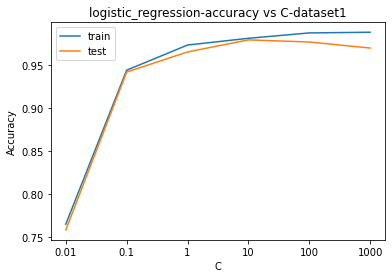

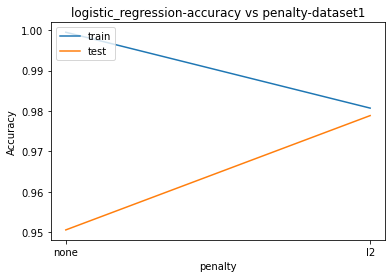

Model: LogisticRegression(C=10)
Best Params
{'C': 10, 'penalty': 'l2'}
Accuracy: 97.88482834994463
Evaluation for  logistic_regression
Accuracy score    =  0.958041958041958
Precision score   =  0.9499147485080989
Recall score      =  0.9583152409900131
Roc AUC score     =  0.996151064872052
F1 score          =  0.9400000000000001


-------------------------------------------------------------------------------------
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  56 out of 120 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.2s finished
/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


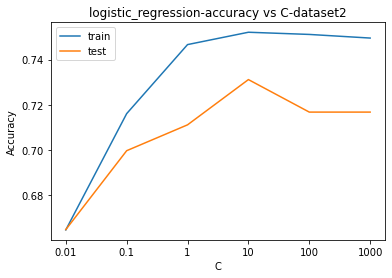

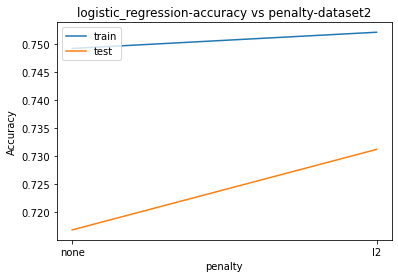

Model: LogisticRegression(C=10)
Best Params
{'C': 10, 'penalty': 'l2'}
Accuracy: 73.11764705882354
Evaluation for  logistic_regression
Accuracy score    =  0.7241379310344828
Precision score   =  0.7065789473684211
Recall score      =  0.6982323232323233
Roc AUC score     =  0.7891679160419791
F1 score          =  0.6190476190476191


-------------------------------------------------------------------------------------


In [11]:
# Param Grid for Logistic Regression
param_grid_logisticRegr = {'C': [ 0.01, 0.1, 1, 10, 100, 1000], "penalty" : ["none", "l2"]}
                                                                                  ## changed


hyperParamTuning("logistic_regression",param_grid_logisticRegr,x_train1,y_train1,x_test1, y_test1, "dataset1")
hyperParamTuning("logistic_regression",param_grid_logisticRegr,x_train2,y_train2,x_test2, y_test2, "dataset2")

Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    0.8s finished
/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


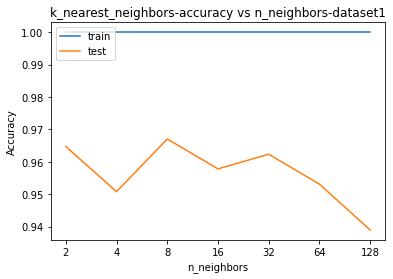

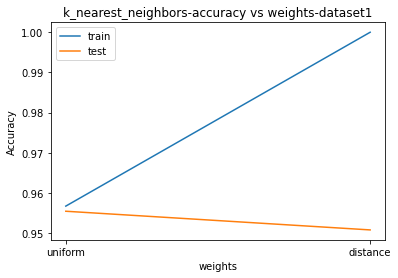

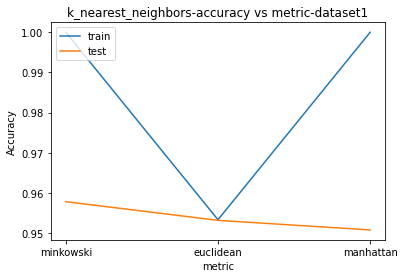

Model: KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')
Best Params
{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
Accuracy: 97.4141749723145
Evaluation for  k_nearest_neighbors
Accuracy score    =  0.951048951048951
Precision score   =  0.9438709677419355
Recall score      =  0.94811115935736
Roc AUC score     =  1.0
F1 score          =  0.9292929292929293


-------------------------------------------------------------------------------------
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    0.5s finished
/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


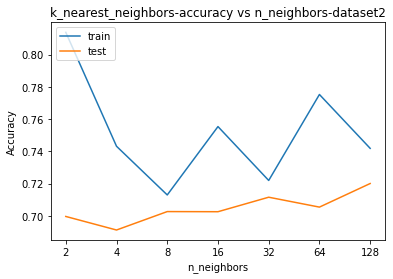

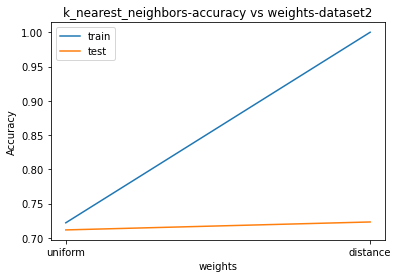

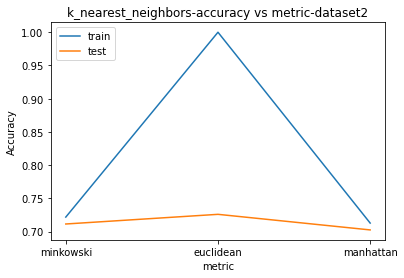

Model: KNeighborsClassifier(n_neighbors=32)
Best Params
{'metric': 'minkowski', 'n_neighbors': 32, 'weights': 'uniform'}
Accuracy: 73.47058823529412
Evaluation for  k_nearest_neighbors
Accuracy score    =  0.7155172413793104
Precision score   =  0.7452523060227889
Recall score      =  0.6426767676767676
Roc AUC score     =  0.7824587706146926
F1 score          =  0.4761904761904762


-------------------------------------------------------------------------------------


In [12]:
# Param Grid for KNN
k_range = [2,4,8,16,32,64,128] #changed
weights = ['uniform','distance']
metric = ['minkowski','euclidean','manhattan']
param_grid_knn = dict(n_neighbors=k_range, weights = weights , metric = metric )

hyperParamTuning("k_nearest_neighbors",param_grid_knn,x_train1,y_train1,x_test1, y_test1, "dataset1")
hyperParamTuning("k_nearest_neighbors",param_grid_knn,x_train2,y_train2,x_test2, y_test2, "dataset2")

Fitting 10 folds for each of 896 candidates, totalling 8960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 5352 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 8924 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 8960 out of 8960 | elapsed:    5.6s finished


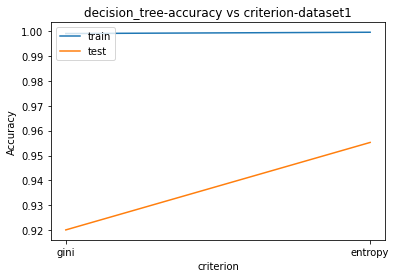

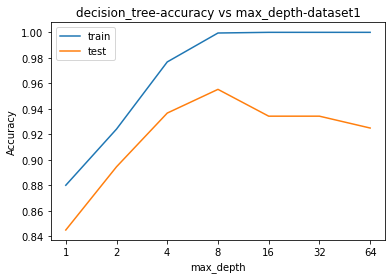

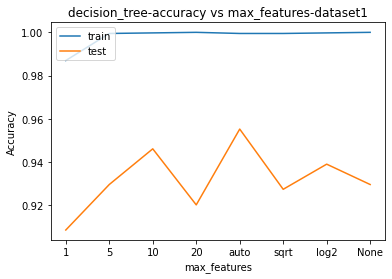

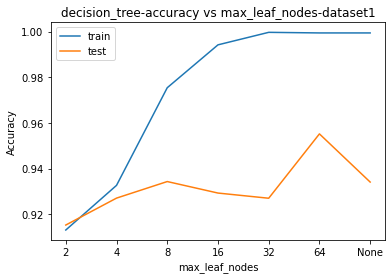

Model: DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=64)
Best Params
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': 64}
Accuracy: 95.52602436323367
Evaluation for  decision_tree
Accuracy score    =  0.9370629370629371
Precision score   =  0.9258241758241759
Recall score      =  0.9374728614850196
Roc AUC score     =  1.0
F1 score          =  0.9108910891089108


-------------------------------------------------------------------------------------
Fitting 10 folds for each of 896 candidates, totalling 8960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 8052 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 8960 out of 8960 | elapsed:    4.1s finished


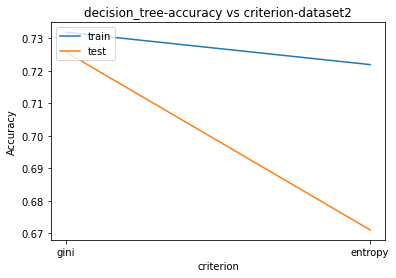

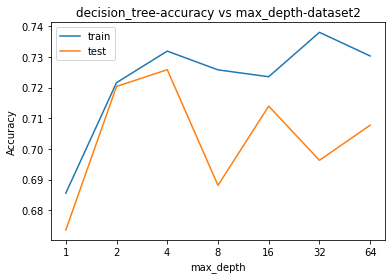

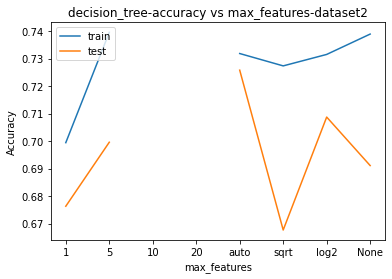

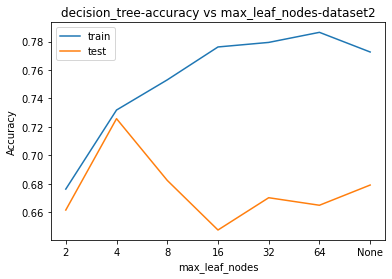

Model: DecisionTreeClassifier(max_depth=4, max_features='auto', max_leaf_nodes=4)
Best Params
{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'max_leaf_nodes': 4}
Accuracy: 72.5798319327731
Evaluation for  decision_tree
Accuracy score    =  0.6982758620689655
Precision score   =  0.6872659176029963
Recall score      =  0.6420454545454546
Roc AUC score     =  0.7063343328335832
F1 score          =  0.5070422535211268


-------------------------------------------------------------------------------------


In [13]:
# Param Grid for Decison tree
param_grid_decisionTree = {'criterion':['gini','entropy'],
            "max_depth" : [1,2,4,8,16,32,64],
            "max_features":[1,5,10,20,"auto","sqrt","log2",None],
            "max_leaf_nodes":[1,2,4,8,16,32,64,None] } #changed

hyperParamTuning("decision_tree",param_grid_decisionTree,x_train1,y_train1,x_test1, y_test1, "dataset1")
hyperParamTuning("decision_tree",param_grid_decisionTree,x_train2,y_train2,x_test2, y_test2, "dataset2")

Fitting 10 folds for each of 1008 candidates, totalling 10080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 424 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1704 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 3496 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 5800 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 7422 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 8732 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 10080 out of 10080 | elapsed:  1.2min finished
/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


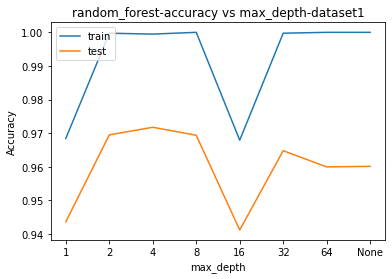

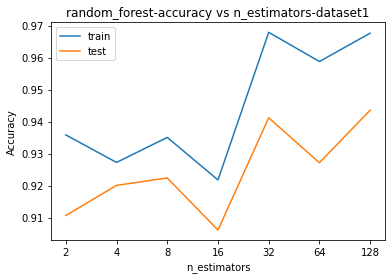

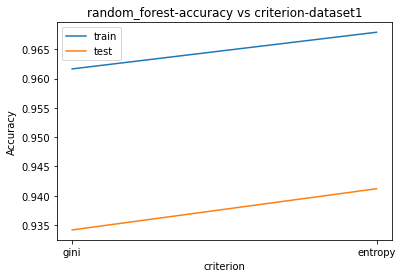

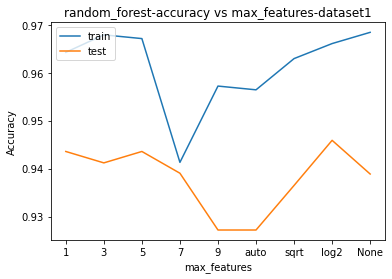

Model: RandomForestClassifier(criterion='entropy', max_depth=16, max_features=3,
                       n_estimators=32)
Best Params
{'criterion': 'entropy', 'max_depth': 16, 'max_features': 3, 'n_estimators': 32}
Accuracy: 97.18161683277962
Evaluation for  random_forest
Accuracy score    =  0.9440559440559441
Precision score   =  0.9379070777247069
Recall score      =  0.9379070777247069
Roc AUC score     =  1.0
F1 score          =  0.9183673469387755


-------------------------------------------------------------------------------------
Fitting 10 folds for each of 1008 candidates, totalling 10080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 424 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1704 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 3496 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 5800 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 8322 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 9680 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 10080 out of 10080 | elapsed:  1.0min finished
/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


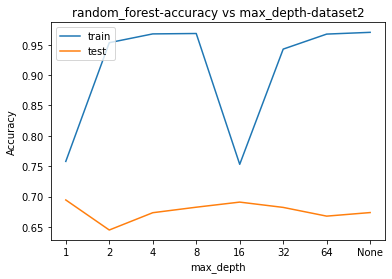

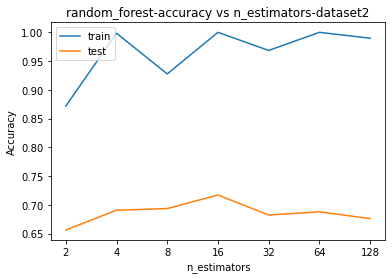

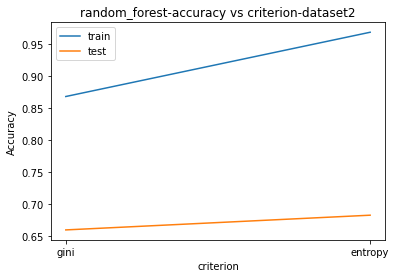

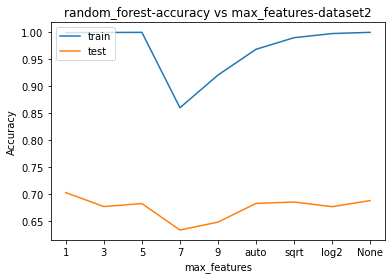

Model: RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=32)
Best Params
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 32}
Accuracy: 73.45378151260505
Evaluation for  random_forest
Accuracy score    =  0.7155172413793104
Precision score   =  0.7068965517241379
Recall score      =  0.6647727272727273
Roc AUC score     =  0.9983133433283358
F1 score          =  0.547945205479452


-------------------------------------------------------------------------------------


In [14]:
# Param Grid for RandomForestClassifier()
max_depth=[1,2, 4, 8, 16,32,64,None]
n_estimators = [2,4,8,16,32, 64, 128] #change
criterion = ['gini','entropy']
max_features = [1,3,5,7,9,"auto","sqrt","log2",None]
param_grid_randomForest = dict(max_depth=max_depth, n_estimators=n_estimators, criterion = criterion, max_features = max_features)

hyperParamTuning("random_forest",param_grid_randomForest,x_train1,y_train1,x_test1, y_test1, "dataset1")
hyperParamTuning("random_forest",param_grid_randomForest,x_train2,y_train2,x_test2, y_test2, "dataset2")

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  56 out of 120 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   31.7s finished
/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


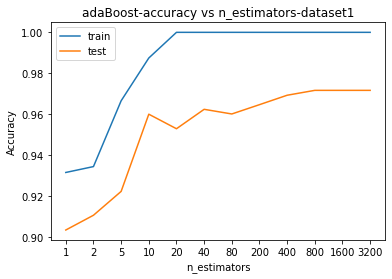

Model: AdaBoostClassifier(n_estimators=800)
Best Params
{'n_estimators': 800}
Accuracy: 97.17054263565892
Evaluation for  adaBoost
Accuracy score    =  0.986013986013986
Precision score   =  0.9803921568627452
Recall score      =  0.9893617021276595
Roc AUC score     =  1.0
F1 score          =  0.98


-------------------------------------------------------------------------------------
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  56 out of 120 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   20.9s finished
/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


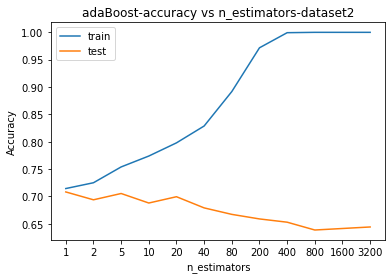

Model: AdaBoostClassifier(n_estimators=1)
Best Params
{'n_estimators': 1}
Accuracy: 70.83193277310926
Evaluation for  adaBoost
Accuracy score    =  0.6293103448275862
Precision score   =  0.6359165424739195
Recall score      =  0.643939393939394
Roc AUC score     =  0.6822338830584708
F1 score          =  0.5904761904761906


-------------------------------------------------------------------------------------


In [15]:
## Param Grid for adaBoost
param_grid_adaBoost = dict()
param_grid_adaBoost['n_estimators'] = [1,2,5,10,20,40,80,200,400,800,1600,3200] #changed


hyperParamTuning("adaBoost",param_grid_adaBoost,x_train1,y_train1,x_test1, y_test1, "dataset1")
hyperParamTuning("adaBoost",param_grid_adaBoost,x_train2,y_train2,x_test2, y_test2, "dataset2")

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:    1.5s finished
/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


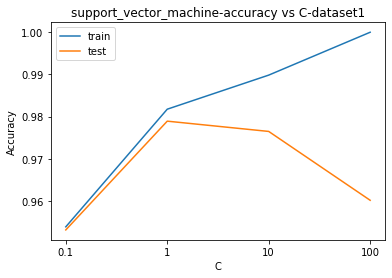

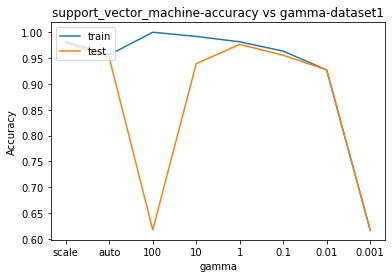

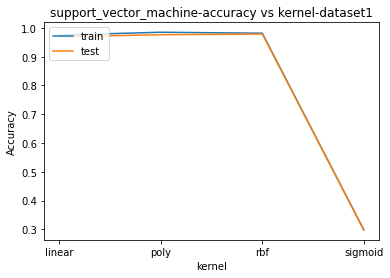

Model: SVC(C=1)
Best Params
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 97.89036544850498
Evaluation for  support_vector_machine
Accuracy score    =  0.9790209790209791
Precision score   =  0.9746236559139785
Recall score      =  0.9791576204950065
F1 score          =  0.9696969696969697


-------------------------------------------------------------------------------------
Fitting 10 folds for each of 128 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 524 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1134 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:  4.5min finished
/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


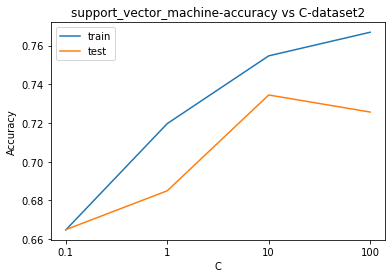

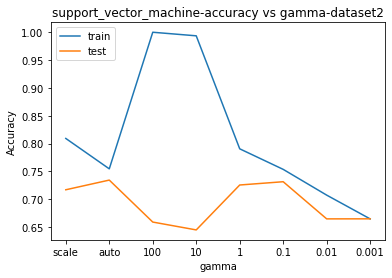

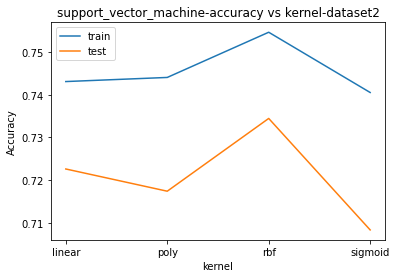

Model: SVC(C=10, gamma='auto')
Best Params
{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 73.4453781512605
Evaluation for  support_vector_machine
Accuracy score    =  0.6982758620689655
Precision score   =  0.681404174573055
Recall score      =  0.6508838383838383
F1 score          =  0.5333333333333333


-------------------------------------------------------------------------------------


In [16]:
# Param Grid for SVC
param_grid_svc = {'C': [0.1, 1, 10, 100],  
              'gamma': ['scale', 'auto',100,10,1, 0.1, 0.01, 0.001], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

hyperParamTuning("support_vector_machine",param_grid_svc,x_train1,y_train1,x_test1, y_test1, "dataset1")
hyperParamTuning("support_vector_machine",param_grid_svc,x_train2,y_train2,x_test2, y_test2, "dataset2")